In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
data = pd.read_csv('world.csv')

To identify Nulls in our dataset

In [118]:
data.head(5)

country                               region  population     area  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   647500   
1         Albania   EASTERN EUROPE                          3581655    28748   
2         Algeria   NORTHERN AFRICA                        32930091  2381740   
3  American Samoa   OCEANIA                                   57794      199   
4         Andorra   WESTERN EUROPE                            71201      468   

   density  coastline_area_ratio  net_migration  infant_mortality  \
0     48.0                  0.00          23.06            163.07   
1    124.6                  1.26          -4.93             21.52   
2     13.8                  0.04          -0.39             31.00   
3    290.4                 58.29         -20.71              9.27   
4    152.1                  0.00           6.60              4.05   

   gdp_per_capita  literacy  phones  arable  crops  other  climate  birthrate  \
0           700.0      36.0     3.2   12.13   0.22  87.65      1.0      46.60   
1          4500.0      86.5    71.2   21.09   4.42  74.49      3.0      15.11   
2          6000.0      70.0    78.1    3.22   0.25  96.53      1.0      17.14   
3          8000.0      97.0   259.5   10.00  15.00  75.00      2.0      22.46   
4         19000.0     100.0   497.2    2.22   0.00  97.78      3.0       8.71   

   deathrate  agriculture  industry  service  
0      20.34        0.380     0.240    0.380  
1       5.22        0.232     0.188    0.579  
2       4.61        0.101     0.600    0.298  
3       3.27        0.170     0.030    0.800  
4       6.25        0.170     0.030    0.800

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [106]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita","literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
"service"])

In [107]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)
data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)           

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

In [109]:
data.describe()

population          area       density  coastline_area_ratio  \
count  2.270000e+02  2.270000e+02    227.000000            227.000000   
mean   2.874028e+07  5.982270e+05    379.047137             21.165330   
std    1.178913e+08  1.790282e+06   1660.185825             72.286863   
min    7.026000e+03  2.000000e+00      0.000000              0.000000   
25%    4.376240e+05  4.647500e+03     29.150000              0.100000   
50%    4.786994e+06  8.660000e+04     78.800000              0.730000   
75%    1.749777e+07  4.418110e+05    190.150000             10.345000   
max    1.313974e+09  1.707520e+07  16271.500000            870.660000   

       net_migration  infant_mortality  gdp_per_capita    literacy  \
count     224.000000        224.000000      226.000000  209.000000   
mean        0.038125         35.506964     9689.823009   82.838278   
std         4.889269         35.389899    10049.138513   19.722173   
min       -20.990000          2.290000      500.000000   17.600000   
25%        -0.927500          8.150000     1900.000000   70.600000   
50%         0.000000         21.000000     5550.000000   92.500000   
75%         0.997500         55.705000    15700.000000   98.000000   
max        23.060000        191.190000    55100.000000  100.000000   

            phones      arable       crops       other     climate  \
count   223.000000  225.000000  225.000000  225.000000  205.000000   
mean    236.061435   13.797111    4.564222   81.638311    2.139024   
std     227.991829   13.040402    8.361470   16.140835    0.699397   
min       0.200000    0.000000    0.000000   33.330000    1.000000   
25%      37.800000    3.220000    0.190000   71.650000    2.000000   
50%     176.200000   10.420000    1.030000   85.700000    2.000000   
75%     389.650000   20.000000    4.440000   95.440000    3.000000   
max    1035.600000   62.110000   50.680000  100.000000    4.000000   

        birthrate   deathrate  agriculture    industry     service  
count  224.000000  223.000000   212.000000  211.000000  212.000000  
mean    22.114732    9.241345     0.150844    0.282711    0.565283  
std     11.176716    4.990026     0.146798    0.138272    0.165841  
min      7.290000    2.290000     0.000000    0.020000    0.062000  
25%     12.672500    5.910000     0.037750    0.193000    0.429250  
50%     18.790000    7.840000     0.099000    0.272000    0.571000  
75%     29.820000   10.605000     0.221000    0.341000    0.678500  
max     50.730000   29.740000     0.769000    0.906000    0.954000

In [110]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

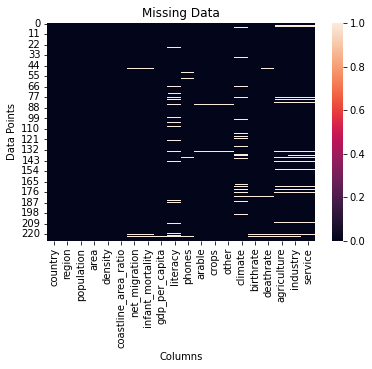

In [111]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

Data Cleaning

In [112]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


In [113]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('mean'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('mean'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('mean'), inplace= True)
data['agriculture'].fillna(0.17, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna((1 - data['agriculture'] - data['service']), inplace= True)

In [114]:
print(data.isnull().sum())


country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64
